In [1]:
import pandas as pd
from datetime import datetime, timedelta
from Fig_2 import get_dataset, plot_freq, plot_sent, plot_others, main
import warnings
warnings.filterwarnings('ignore')

df_all = pd.read_csv('/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/concat/date_fixed_article_level_measures.csv')

In [2]:
def generate_date_list(start, end):
    start_date = datetime.strptime(str(start), '%Y%m%d')
    end_date = datetime.strptime(str(end), '%Y%m%d')
    date_list = []
    while start_date <= end_date:
        date_list.append(int(start_date.strftime('%Y%m%d')))
        start_date += timedelta(days=1)
    return date_list

# need to modify the text: topic > 0.25
def get_headlines(topic, date_list, top=None):
    filtered_df = df_all.query(
        f"`date` in {date_list} and `entropy` >= 2 and `total` >= 100 and `Topic{topic}` > 0.25"
    ).copy()
    filtered_df['weight'] = filtered_df[f'Topic{topic}'] * filtered_df['sentiment']
    filtered_df = filtered_df.sort_values('weight', ascending=True)
    filtered_df = filtered_df[['sentiment', 'entropy', 'date', 'headline']]
    if top:
        filtered_df = filtered_df.head(top)
    return filtered_df

def format_float(value):
    if isinstance(value, float):
        return '{:.3f}'.format(value)
    else:
        return value
    
def int_to_date(value):
    if isinstance(value, int):
        date_obj = datetime.strptime(str(value), '%Y%m%d')
        return date_obj.strftime('%-m/%-d/%Y')
    else:
        return value

In [3]:
var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']

dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(3).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20020410, 20000913, 20000920]
[20100616, 19990714, 20060809]
[20100505, 20100616, 20050831]
[20150325, 20150902, 20150624]
[20021009, 20010314, 20021204]
[20190821, 20190814, 20190828]
[20110316, 20020123, 20020130]


# original series

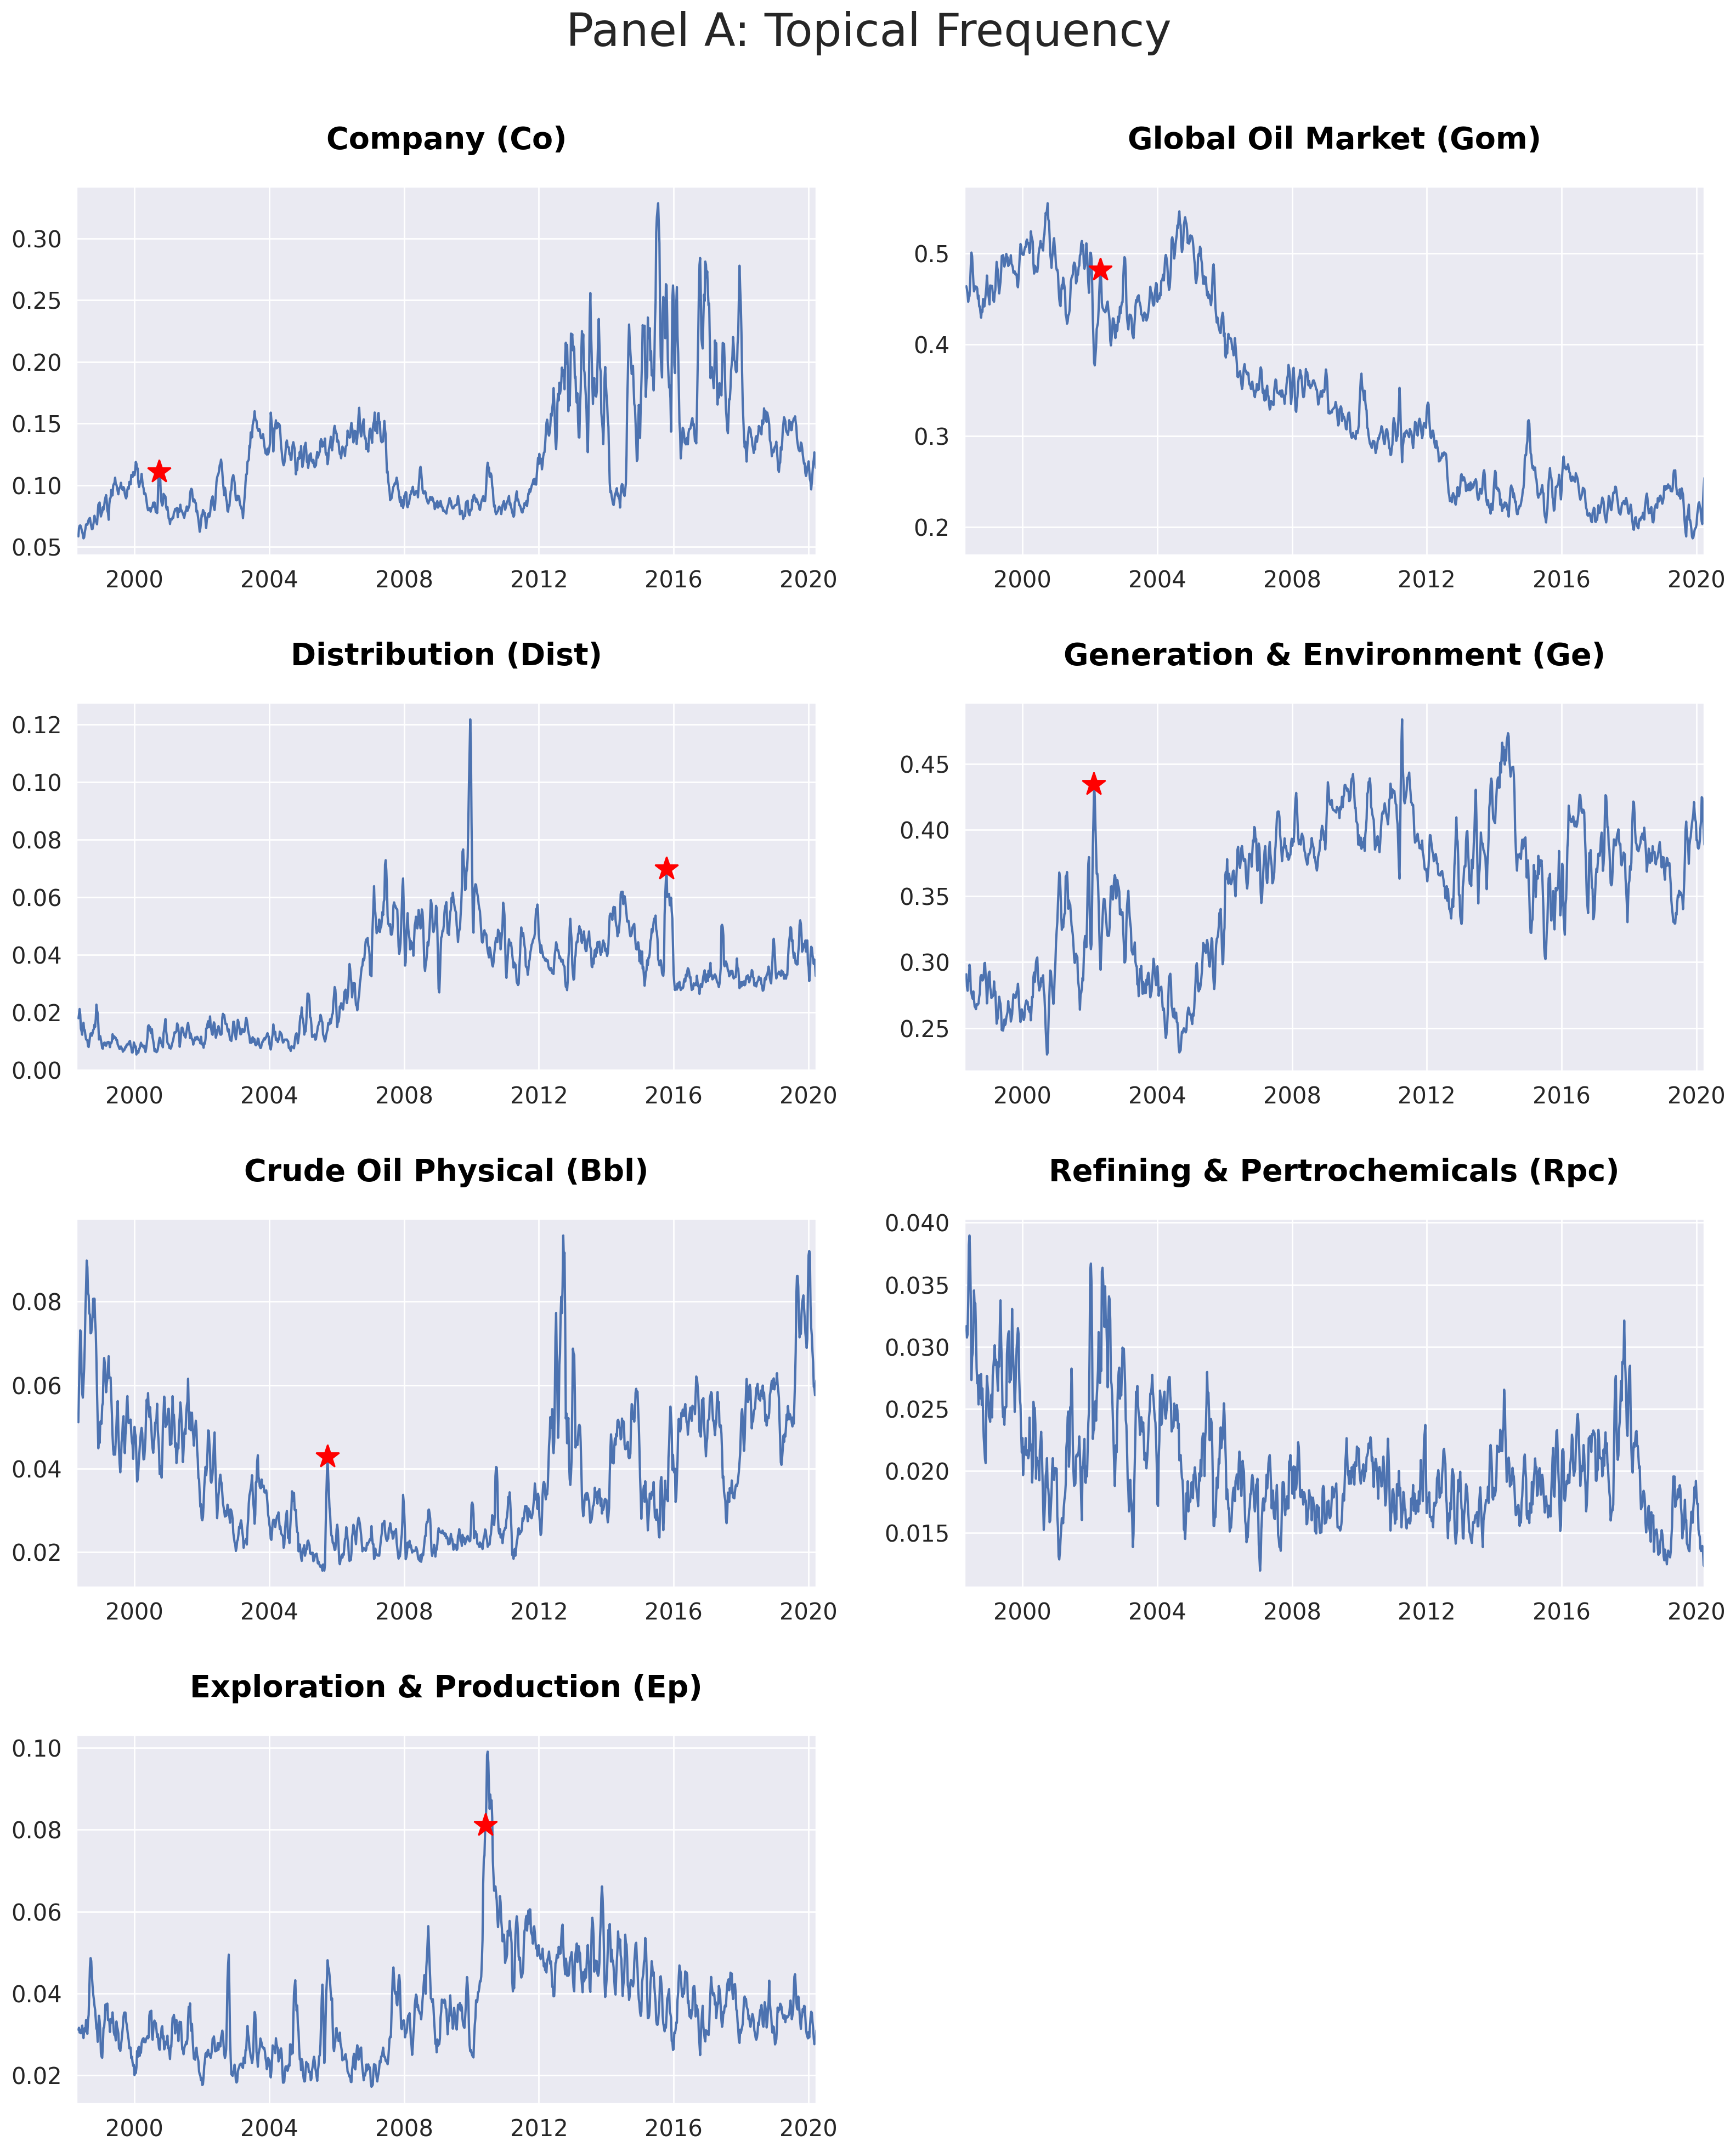

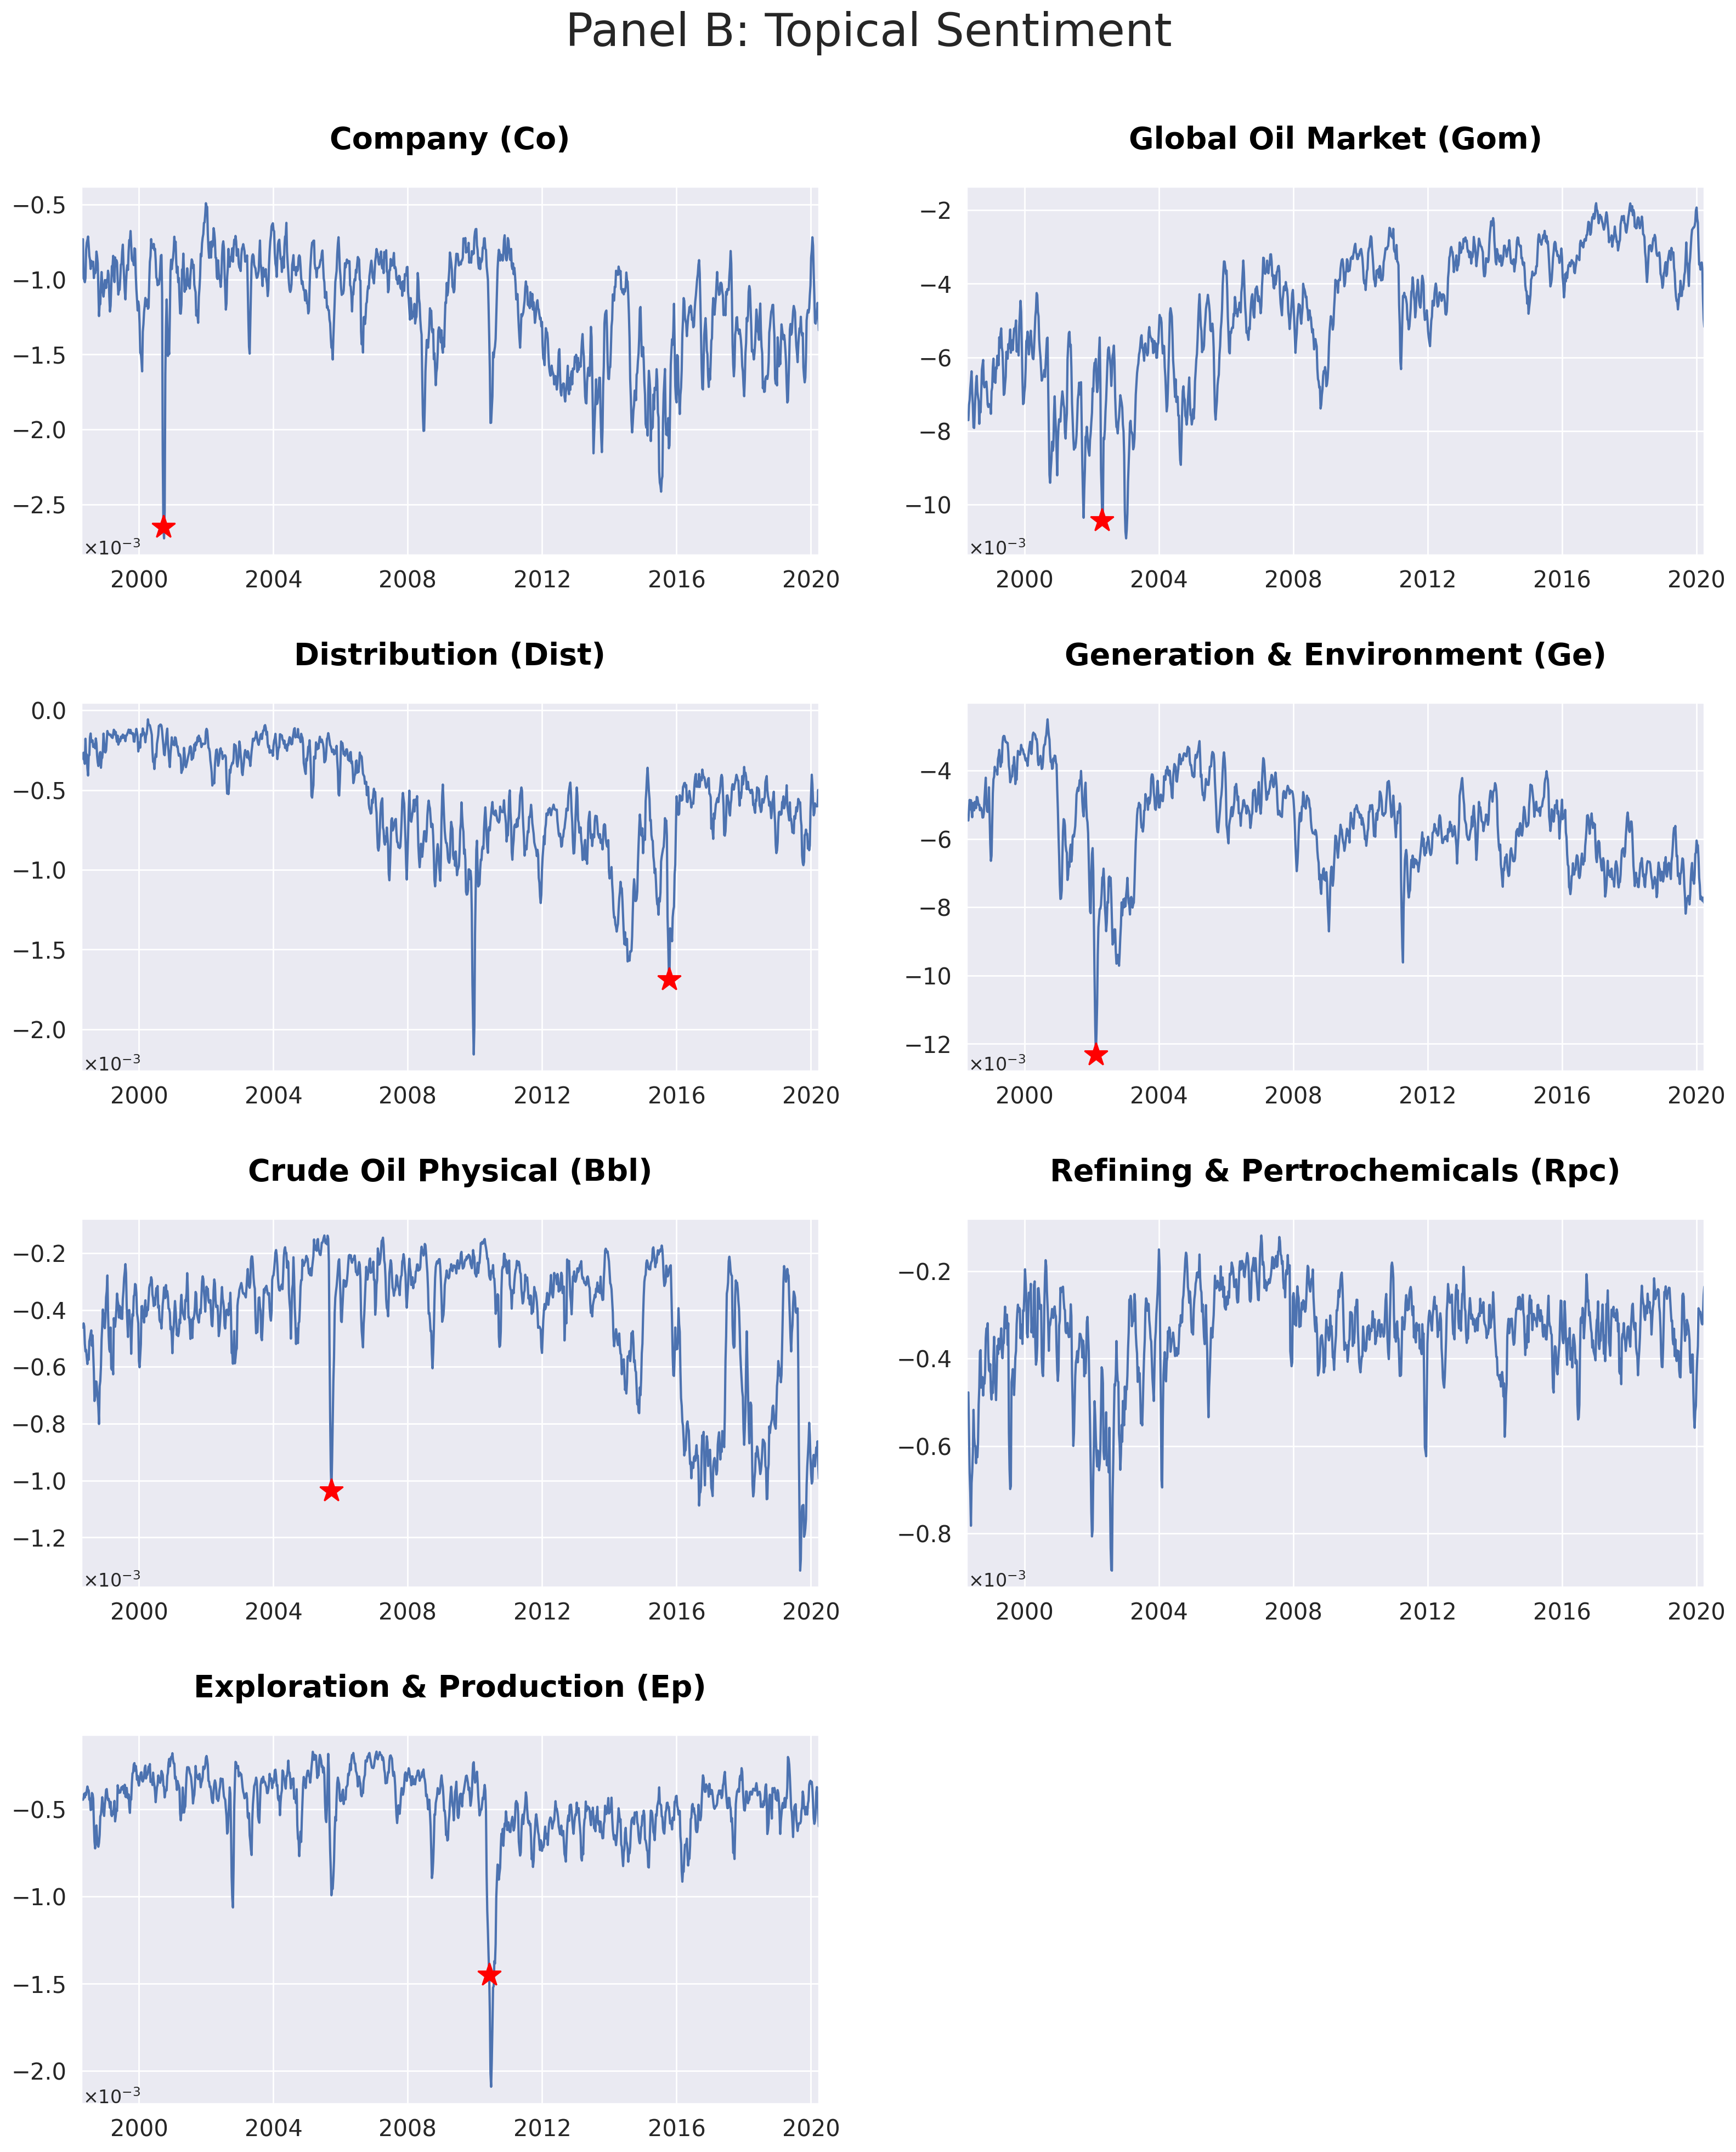

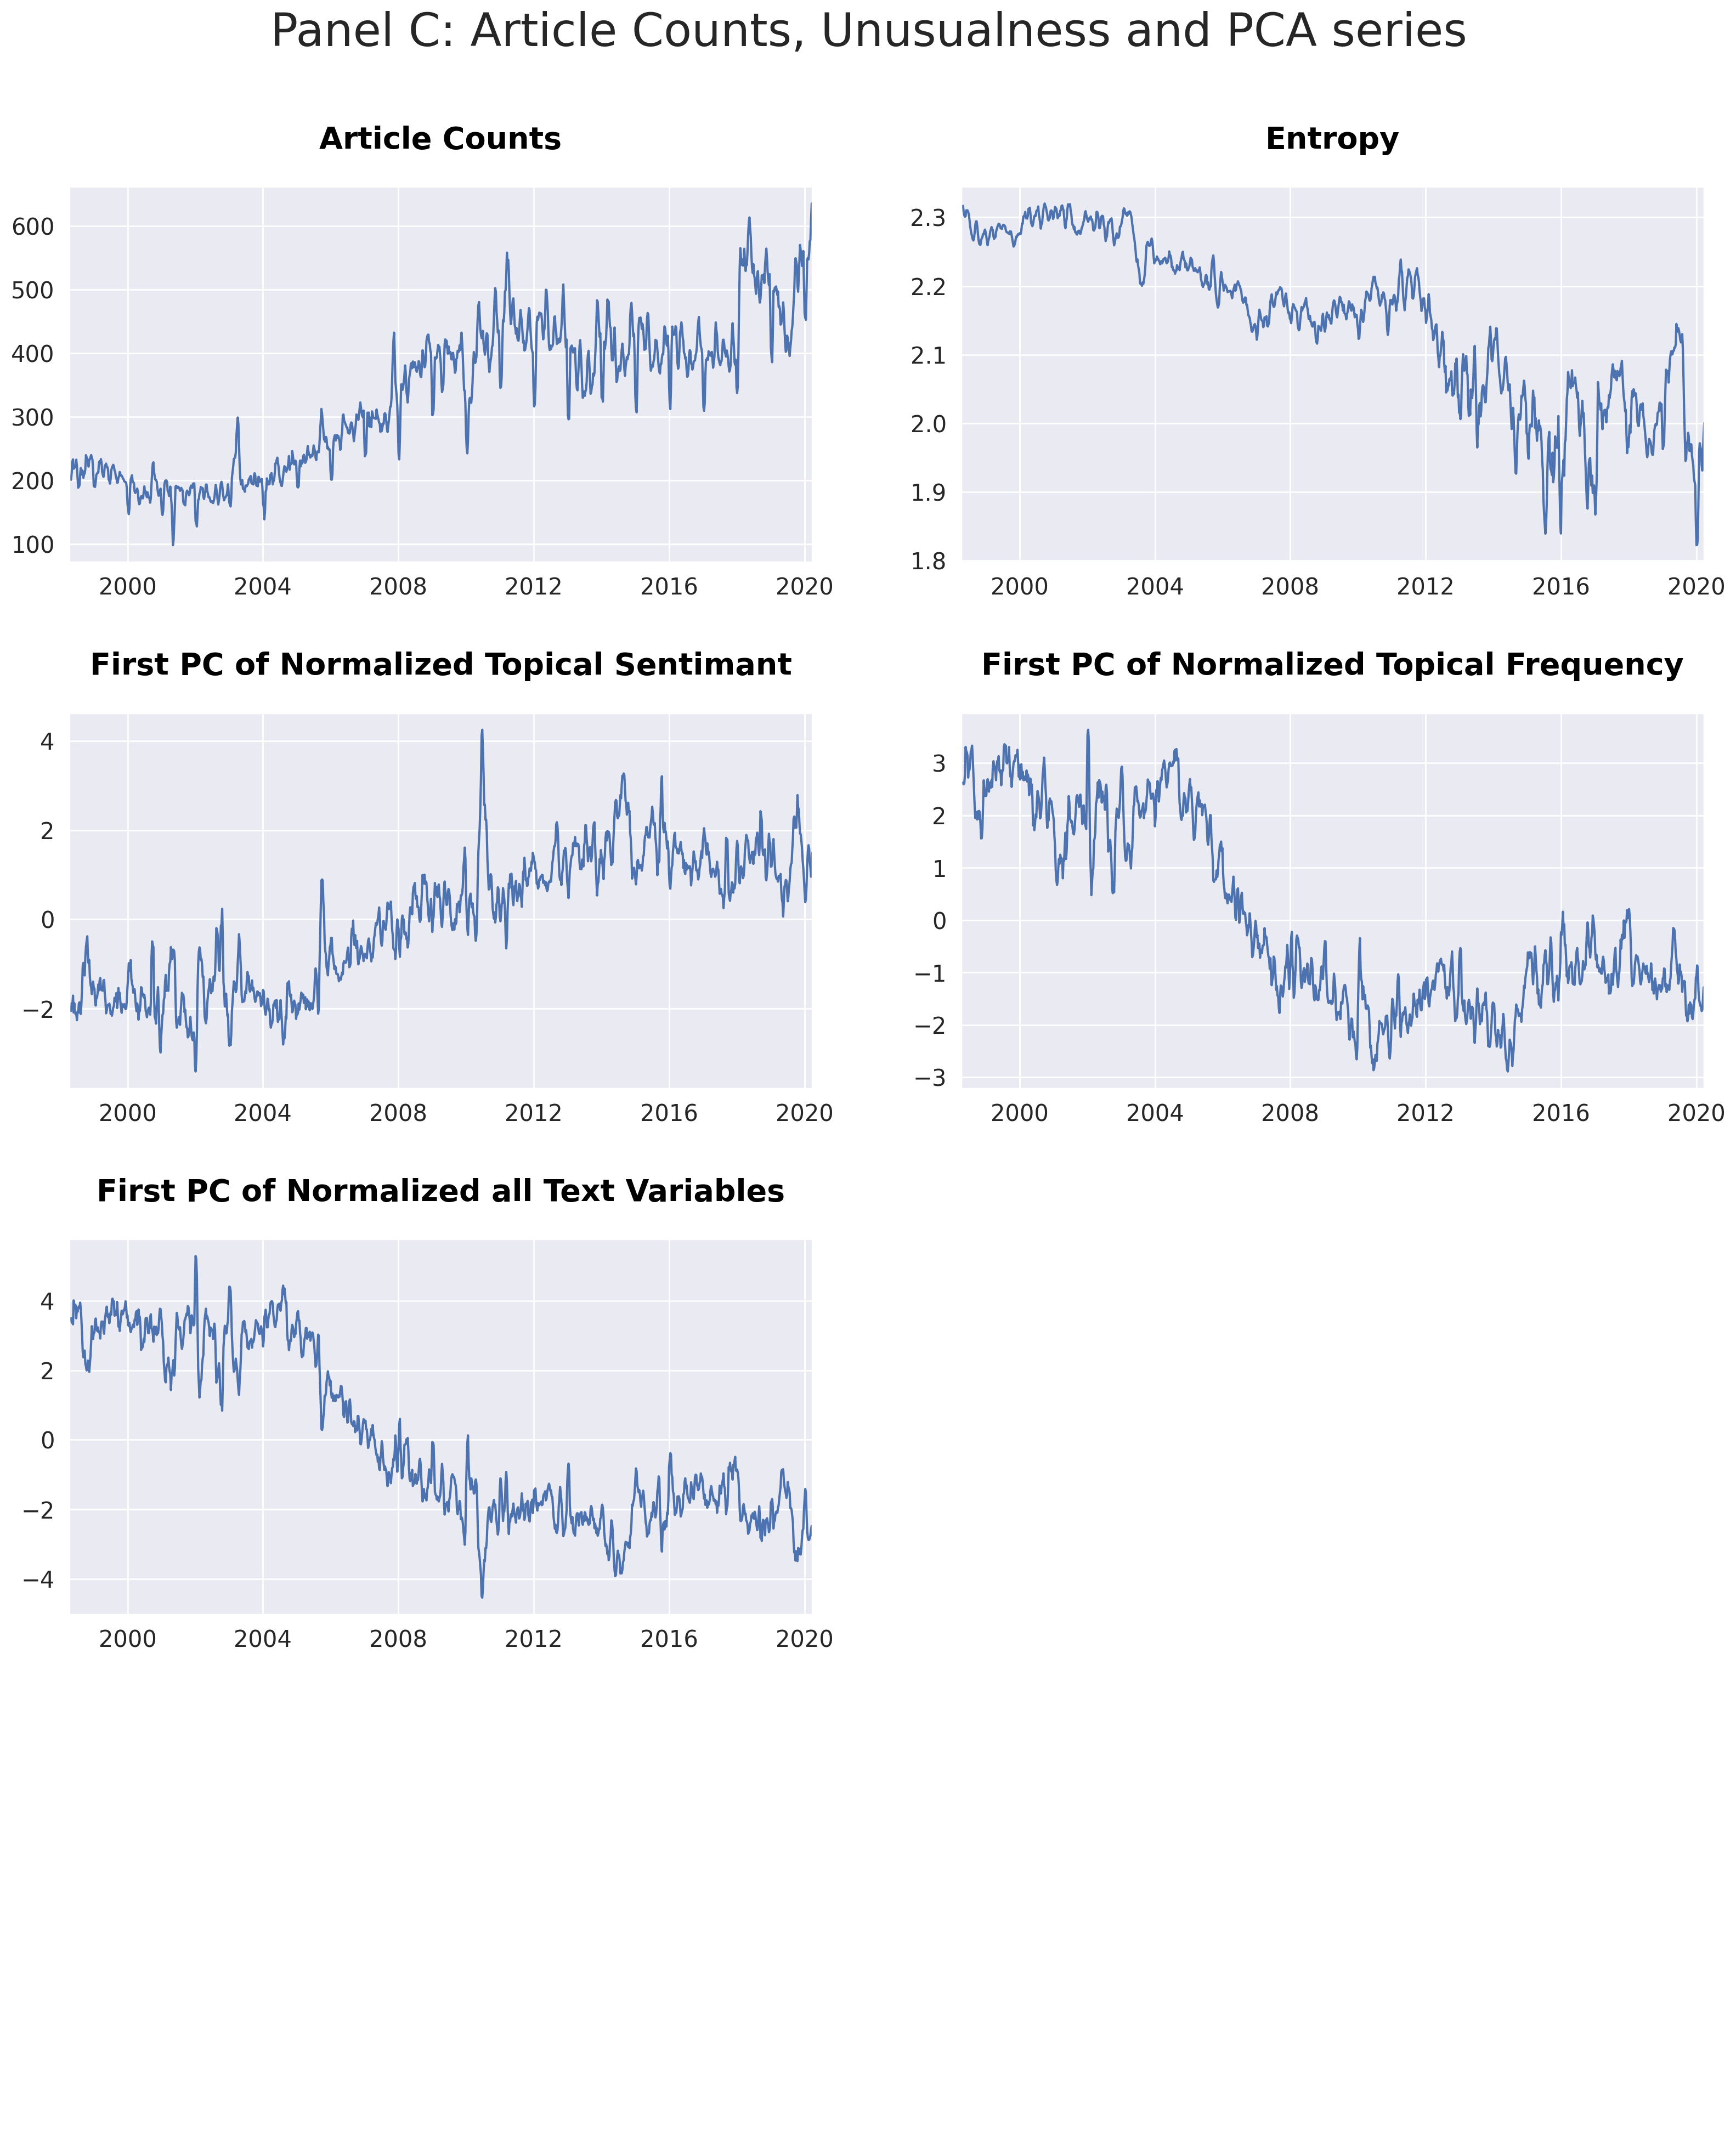

In [4]:
main()

# new topic model (mod)

- construct Table III
- document and clean github (put codes into __archive__)

In [5]:
event_dates = {'1':('2000-09-20','UK fuel protests'),
               '2':('2010-06-16','BP oil spill aftermath on global market'),
               '3':('2010-06-16','BP oil spill aftermath on distribution'),
               '4':('2012-07-04',"Dynegy's bankruptcy"),
               '5':('2002-12-11','Venezuelan general strike'),
               '6':('2019-09-04','Trade war supply shock'),  
               '7':('2002-02-13','Pemexgate'),   
}

df_headlines_list = []
event_title_list = []

old2new = {'Env':'Dist', 'Epg':'Ge'}
new_var_list = [old2new.get(item, item) for item in var_list]
def get_event_title(topic, start_date, end_date):
    return f"{new_var_list[topic-1]}: {event_dates[str(topic)][-1]} from {int_to_date(start_date)} \
to {int_to_date(end_date)}"

In [6]:
topic = 1
start_date, end_date = 20000823, 20000920
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=5)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
194731  -0.065574  2.332273  20000911  \
194797  -0.115385  2.298195  20000912   
194917  -0.092437  2.360878  20000913   
195459  -0.068027  2.447229  20000919   
195554  -0.098214  2.335806  20000920   

                                                 headline  
194731  EU says plans no action over French truck bloc...  
194797   UK's Blair to hold urgent talks over fuel crisis  
194917  EU asks Belgium for information on trucks protest  
195459    EU govts to hold crisis talks far from Brussels  
195554  Worries over fuel supply delay UK sugar proces...

In [7]:
# BP oil spill aftermath on global market
topic = 2
start_date, end_date = 20100505, 20100616
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=190)
word_list = ['BP', 'spil']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                          for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
864466  -0.128378  2.271015  20100518  \
864535  -0.058537  2.356951  20100519   
864873  -0.059524  2.381257  20100524   
872797  -0.073333  2.384223  20100603   
873170  -0.073529  2.394664  20100608   

                                                 headline  
864466  Goldman, BP sued over alleged SemGroup conspiracy  
864535  UPDATE 1-Obama disappointed Senate oil spill m...  
864873  UPDATE 1-Louisiana slams BP, govt for slow oil...  
872797      Biden acknowledges message lapse on oil spill  
873170  BREAKINGVIEWS-Did Goldman sabotage BP's blowou...

In [8]:
# BP oil spill aftermath on distribution
topic = 3
start_date, end_date = 20100505, 20100616
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date))
word_list = ['BP', 'spil']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                          for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)

df_headlines['headline'].iloc[0] = df_headlines['headline'].iloc[0][:51]
print(df_headlines['headline'].iloc[0])
display(df_headlines)
df_headlines_list.append(df_headlines)

U.S. REFINERY FILING - BP TEXAS CITY CHEMICAL PLANT


sentiment   entropy      date   
860543  -0.018182  2.340447  20100513  \
865231  -0.010870  2.406125  20100528   
873022  -0.067797  2.403666  20100607   
871007  -0.015385  2.533532  20100609   
873965  -0.021531  2.262218  20100616   

                                                 headline  
860543  U.S. REFINERY FILING - BP TEXAS CITY CHEMICAL ...  
865231  BP oil spill shows need for biofuels, develope...  
873022          U.S. EPA hands tied on tough BP sanctions  
871007  Global fossil fuel CO2 falls, 1st time since '...  
873965  STOCKS NEWS US-Pride Int'l: rev to be hit if B...

In [9]:
# Dynegy's bankruptcy 
# https://en.wikipedia.org/wiki/Dynegy#2012_bankruptcy
topic = 4
#start_date, end_date = 20120401, 20120509
start_date, end_date = 20111107, 20120705
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=200)
word_list = ['Dynegy']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
df_headlines.drop(index=[1065908,1065983], inplace=True) # repeated entries
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
1035031  -0.068796  2.376672  20111108  \
1065907  -0.116071  2.380752  20120309   
1068487  -0.113514  2.280921  20120312   
1068860  -0.090909  2.306779  20120316   
1074761  -0.071090  2.400539  20120404   
1086676  -0.068966  2.427169  20120510   

                                                  headline  
1035031  UPDATE 1-Dynegy shares jump as bankruptcy loss...  
1065907  Dynegy bankruptcy examiner faults company deal...  
1068487  US govt seeks bankruptcy trustee for Dynegy Ho...  
1068860  UPDATE 1-Dynegy disappointed with examiner's r...  
1074761  UPDATE 1-Dynegy says settles disputes over ban...  
1086676  UPDATE 1-Dynegy loss narrows on gas generation...

In [10]:
# Venezuelan general strike
# https://en.wikipedia.org/wiki/Venezuelan_general_strike_of_2002%E2%80%932003
topic = 5
start_date, end_date = 20021202, 20030330
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=80)
word_list = ['Venezuela', 'strike']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
df_headlines.drop(index=[314414], inplace=True) # repeated entries
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
300140  -0.023810  2.304579  20021209  \
305293  -0.029630  2.398081  20030128   
305304  -0.042453  2.419813  20030129   
305515  -0.051546  2.402821  20030131   
310655  -0.037736  2.442174  20030226   
314427  -0.070796  2.316315  20030307   

                                                 headline  
300140  U.S. Cash Crudes - Grades steady amid Venezuel...  
305293  US Cash Crudes--Weaker on margins, Iraq, Venez...  
305304       US Cash Crudes -Weaker on margins, Venezuela  
305515  US Cash Crudes - Weaker as Venezuela increases...  
310655  China lifts Venezuela orimulsion after 2-mth d...  
314427  Venezuela Cerro Negro project shuts syncrude unit

In [11]:
# Asian Petrochemical Expansion / Trade War Supply Shock
# https://en.wikipedia.org/wiki/China%E2%80%93United_States_trade_war#2019
topic = 6
start_date, end_date = 20180120, 20191011
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=500)
word_list = ['trade war', 'U.S.-China', 'US-China']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])

df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)

df_headlines['headline'].iloc[1] = df_headlines['headline'].iloc[1][11:]
print(df_headlines['headline'].iloc[1])
display(df_headlines)
df_headlines_list.append(df_headlines)

UPDATE 5-APEC fails to reach consensus as U.S.-China divide deepens


sentiment   entropy      date   
1706115  -0.040373  2.096719  20180620  \
1748776  -0.023466  2.395052  20181119   
1813288  -0.049793  2.449383  20190709   
1812825  -0.055336  2.400910  20190731   
1820338  -0.018672  2.410611  20190823   

                                                  headline  
1706115  HK shares end higher as ZTE surge calms trade ...  
1748776  UPDATE 5-APEC fails to reach consensus as U.S....  
1813288  UPDATE 2-BASF slashes 2019 outlook, blames U.S...  
1812825  China chemical crackdown hurting more than tra...  
1820338  Asian petrochemical profits slammed by trade w...

In [12]:
# Pemex
# https://en.wikipedia.org/wiki/Pemexgate
topic = 7
start_date, end_date = 20020101, 20020228
event_title_list.append(get_event_title(topic, start_date, end_date))

df_headlines = get_headlines(topic=topic, date_list=generate_date_list(start_date, end_date), top=29)
word_list = ['pemex']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])

df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
257881  -0.037879  2.371774  20020109  \
258391  -0.049342  2.335148  20020121   
258553  -0.077778  2.378040  20020124   
258843  -0.055556  2.351105  20020130   
262051  -0.078947  2.347647  20020218   

                                                 headline  
257881      Mexico Pemex to trim work force by 2,000 jobs  
258391  UPDATE 1-Mexico probes Pemex, PRI for corrupti...  
258553    Mexico Pemex graft scandal spilled over borders  
258843  Ex-director of Mexico Pemex denies misuse of f...  
262051  Probe into Mexico Pemex graft scandal points t...

In [13]:
df_list = []
for event_title, df_headlines in zip(event_title_list, df_headlines_list):
    df_event = pd.DataFrame({'sentiment':['',''], 
                             'entropy':['',''], 
                             'date':['',''], 
                             'headline':['',f'\\underline{{{event_title}}}']})
    df_list.extend([df_event, df_headlines])
df = pd.concat(df_list)



df.columns = ['Sentiment', 'Entropy', 'Date', 'Headlines']
df_latex = df.to_latex(index=False, column_format='cccl',
                       formatters={'Sentiment': format_float, 
                                   'Entropy': format_float, 
                                   'Date': int_to_date})
for col in df.columns:
    df_latex = df_latex.replace(col, f'\\textbf{{{col}}}', 1)
print(df_latex)

\begin{tabular}{cccl}
\toprule
\textbf{Sentiment} & \textbf{Entropy} & \textbf{Date} & \textbf{Headlines} \\
\midrule
 &  &  &  \\
 &  &  & \underline{Co: UK fuel protests from 8/23/2000 to 9/20/2000} \\
-0.066 & 2.332 & 9/11/2000 & EU says plans no action over French truck blockade \\
-0.115 & 2.298 & 9/12/2000 & UK's Blair to hold urgent talks over fuel crisis \\
-0.092 & 2.361 & 9/13/2000 & EU asks Belgium for information on trucks protest \\
-0.068 & 2.447 & 9/19/2000 & EU govts to hold crisis talks far from Brussels \\
-0.098 & 2.336 & 9/20/2000 & Worries over fuel supply delay UK sugar processing \\
 &  &  &  \\
 &  &  & \underline{Gom: BP oil spill aftermath on global market from 5/5/2010 to 6/16/2010} \\
-0.128 & 2.271 & 5/18/2010 & Goldman, BP sued over alleged SemGroup conspiracy \\
-0.059 & 2.357 & 5/19/2010 & UPDATE 1-Obama disappointed Senate oil spill measure stalled \\
-0.060 & 2.381 & 5/24/2010 & UPDATE 1-Louisiana slams BP, govt for slow oil response \\
-0.073 & 2.384 

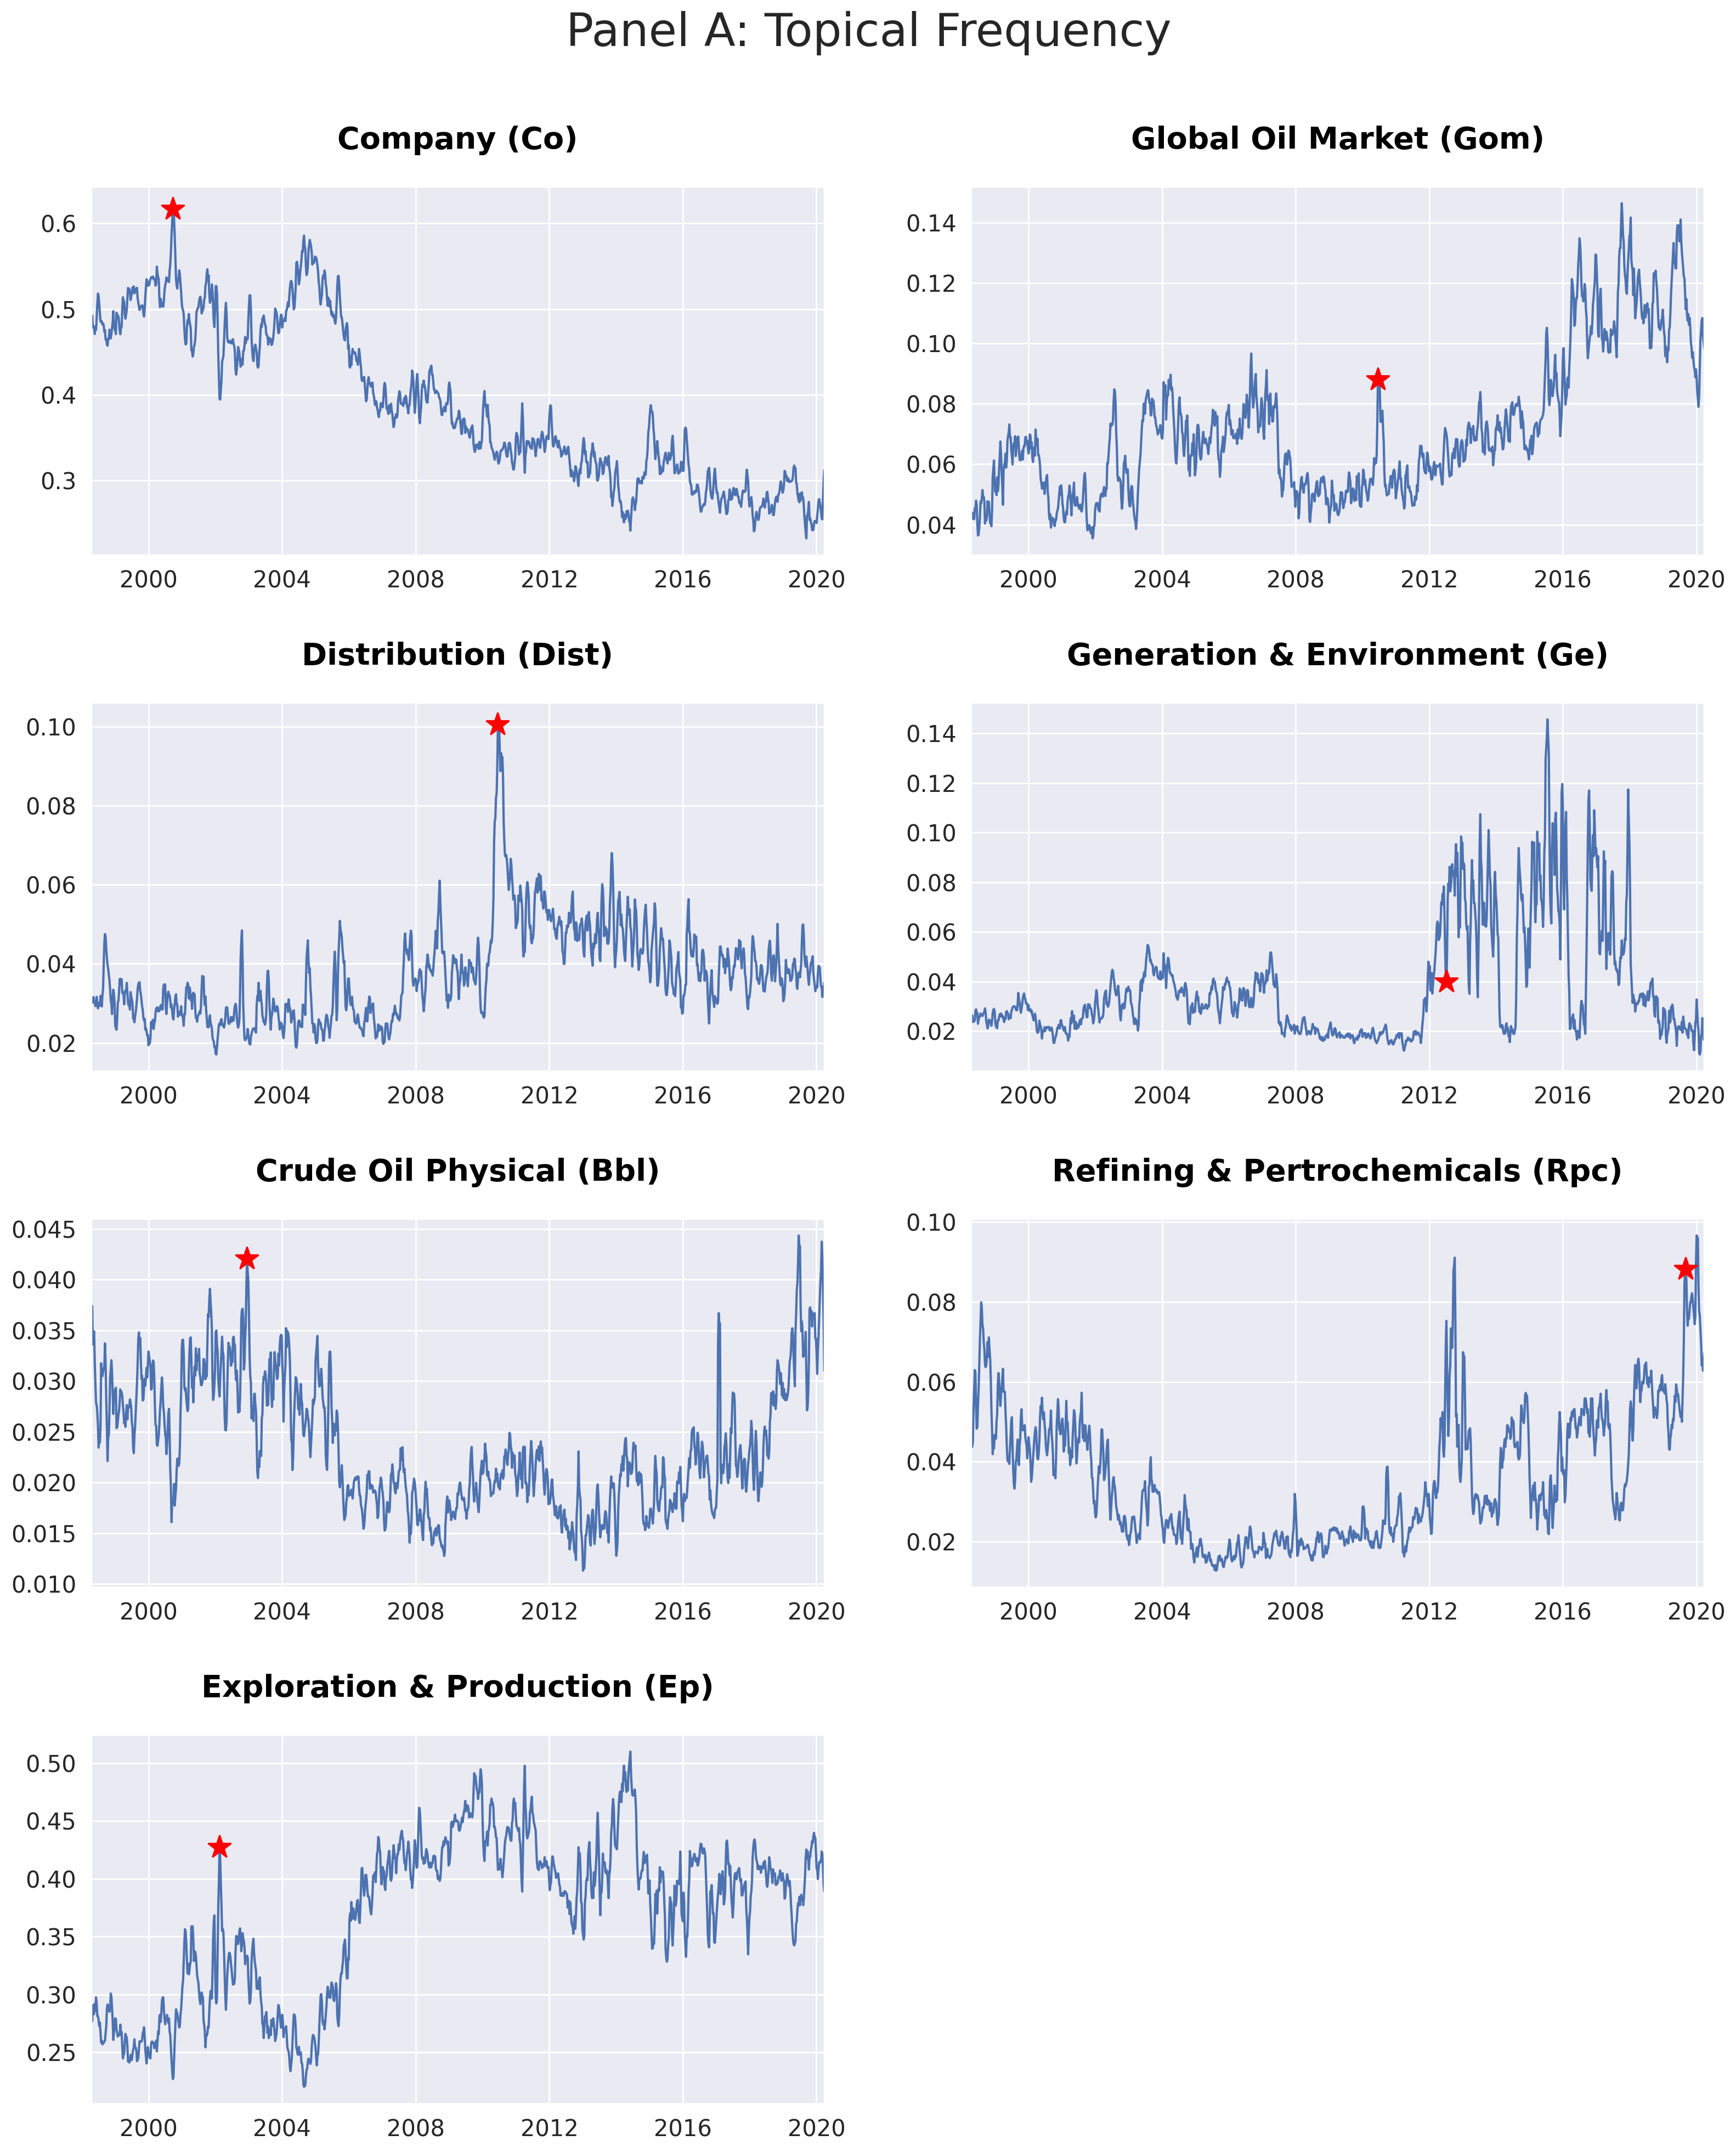

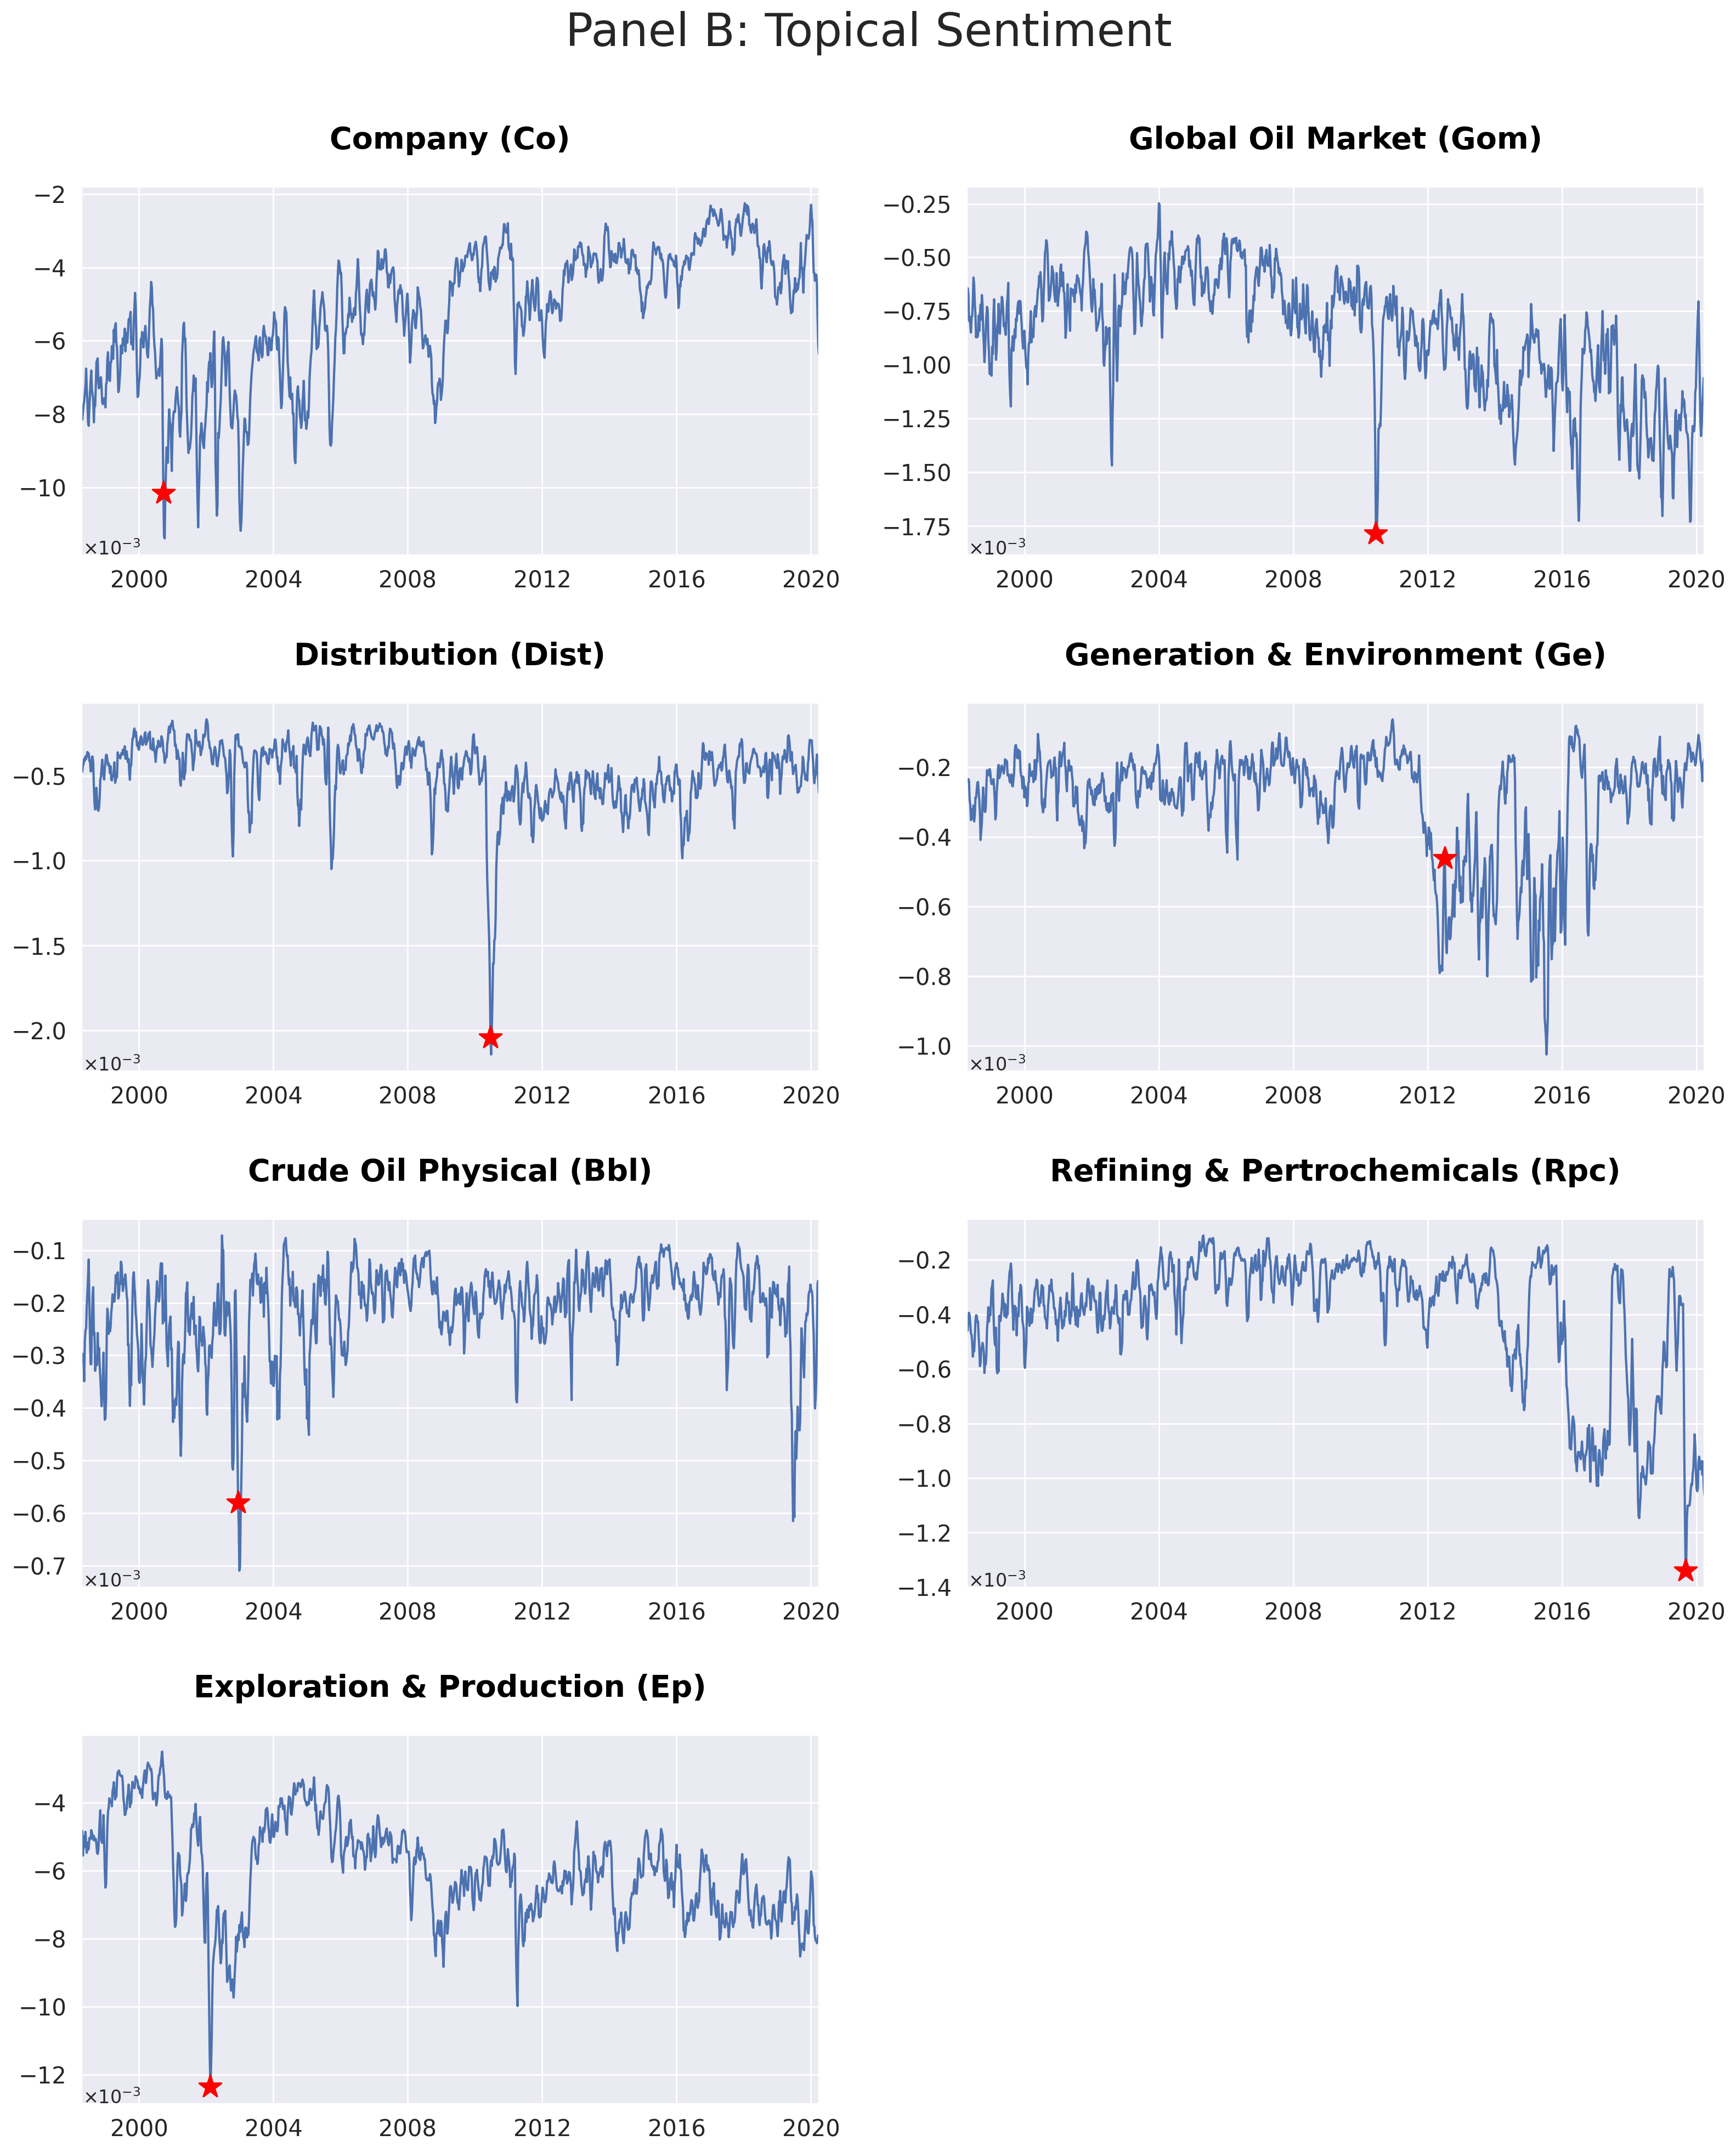

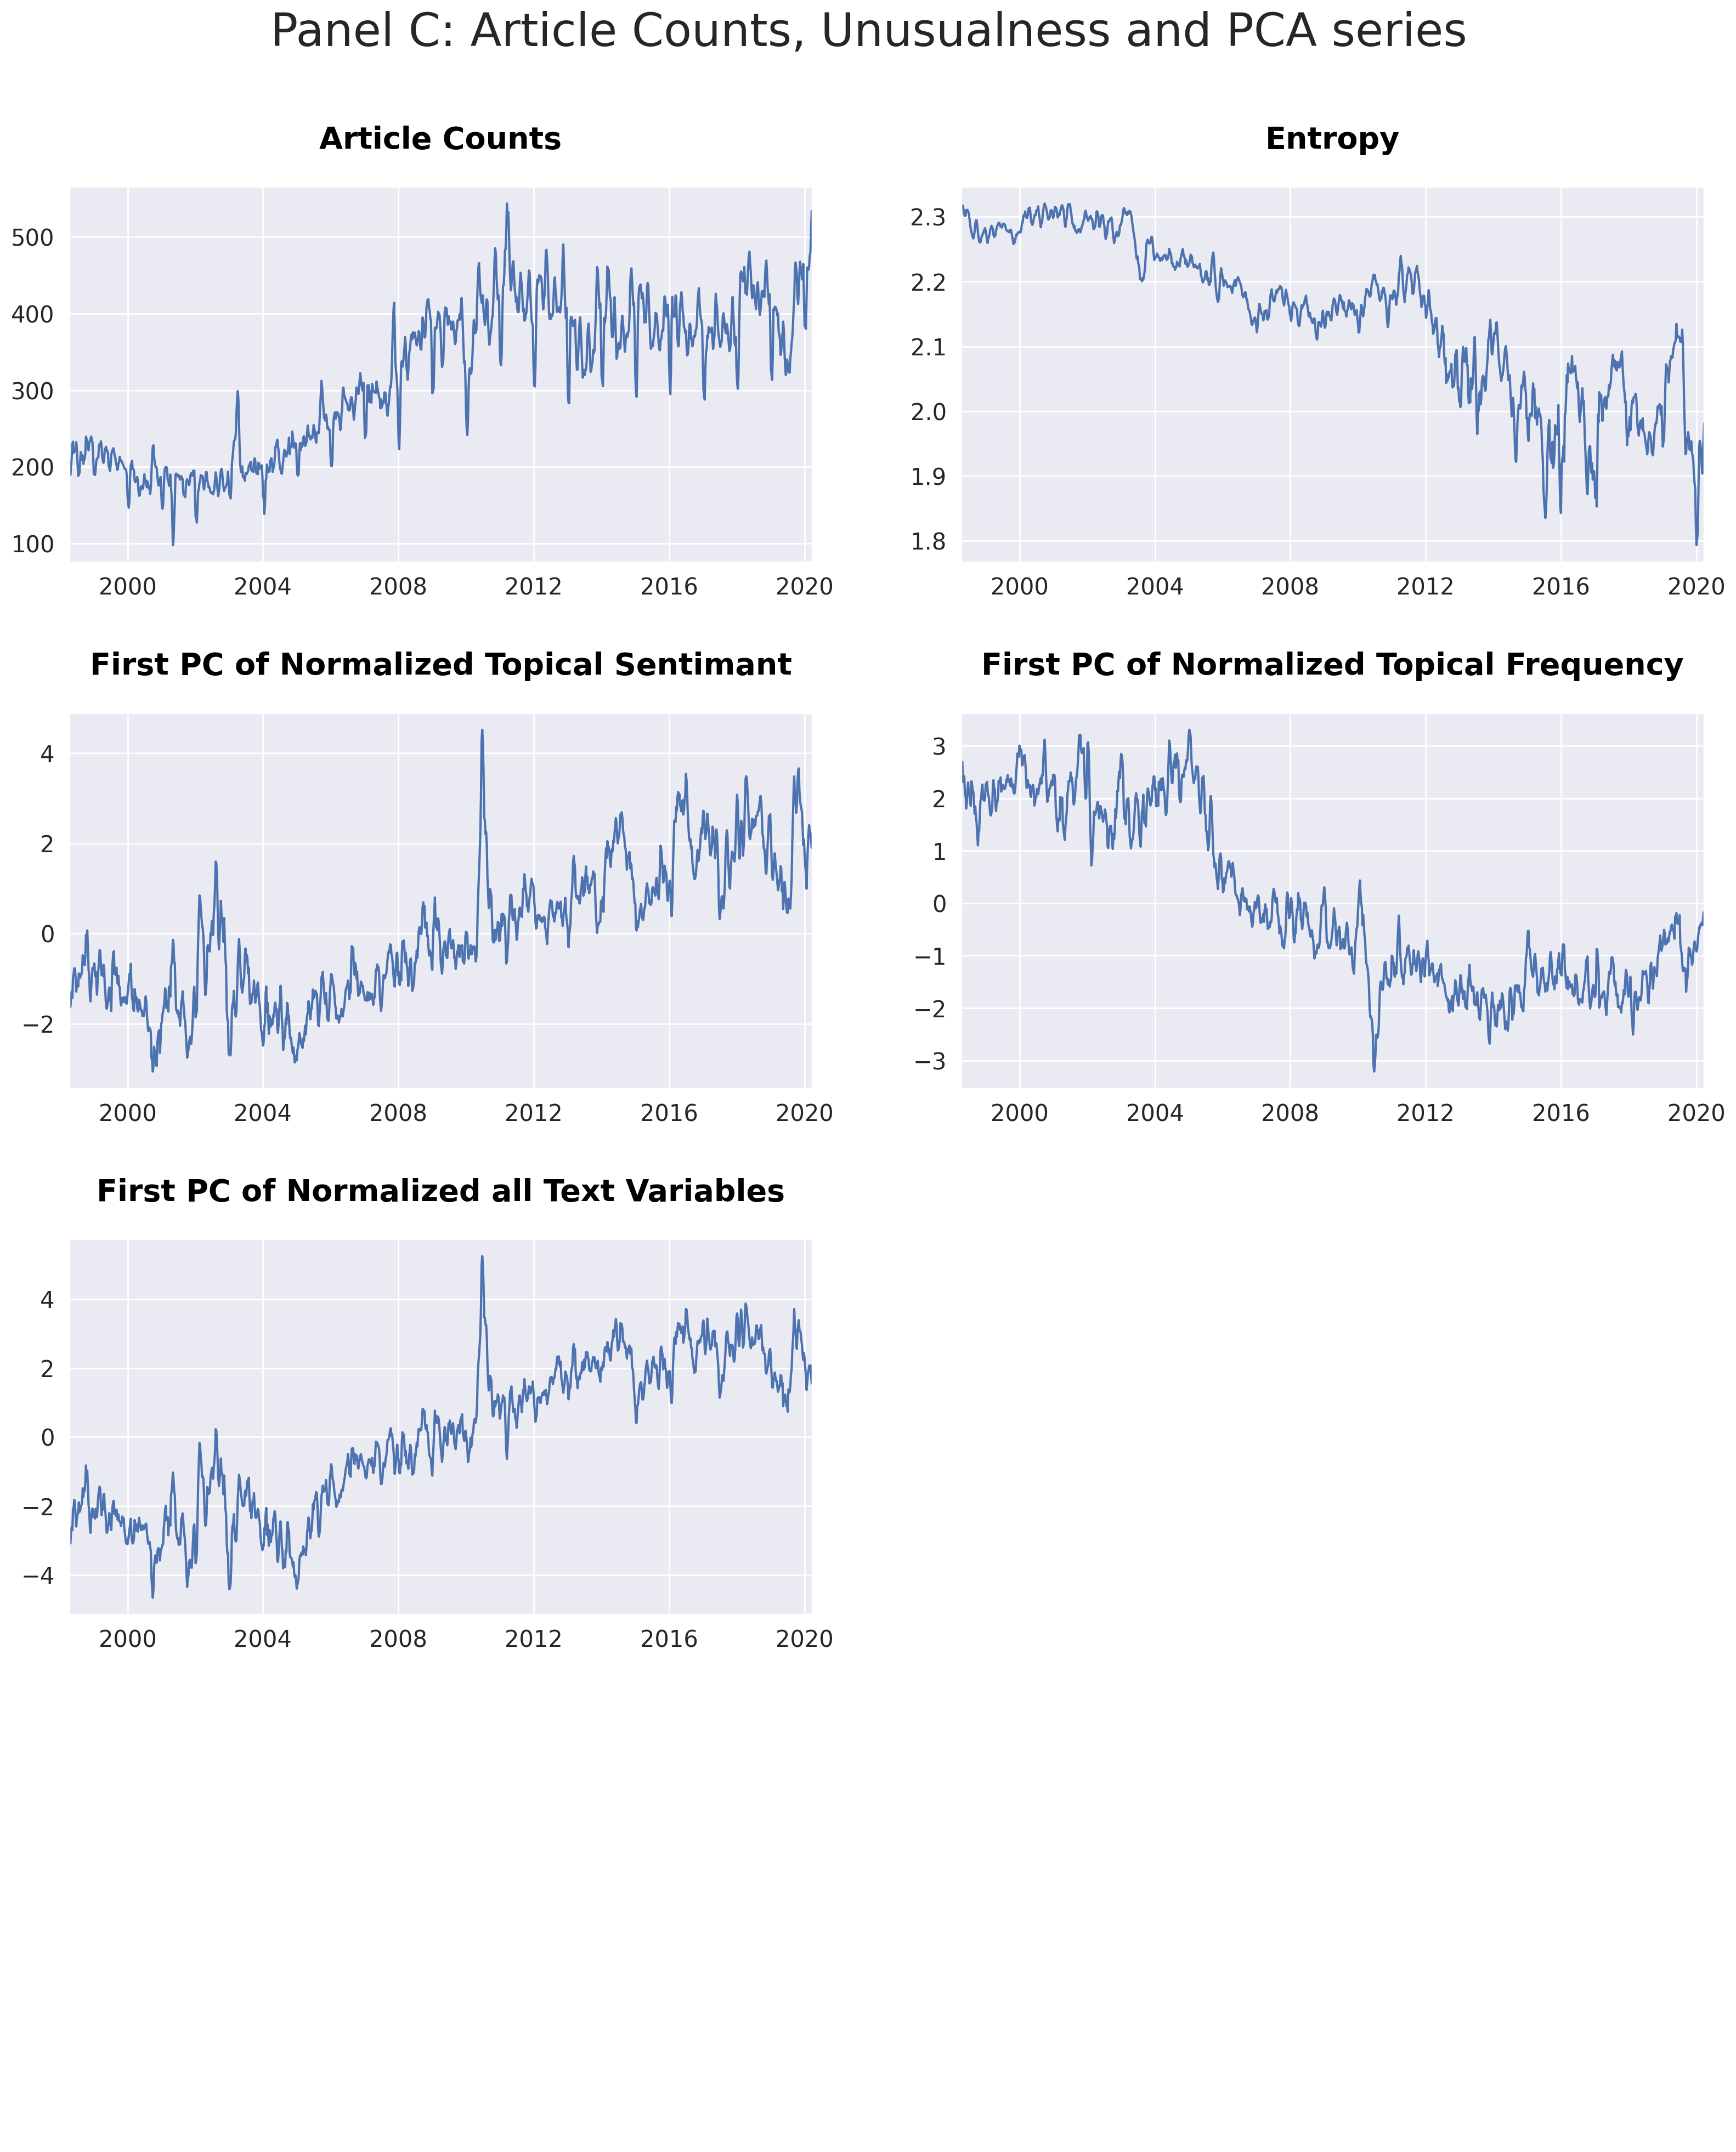

In [14]:
dataset = get_dataset('transformed_data_prices_v19.2_mod.dta')
plot_freq(dataset, event_dates)
plot_sent(dataset, event_dates)
plot_others(dataset)